In [51]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../../energy_dataset.csv")
print(df.columns)
print(df.head)
columns = ["generation hydro pumped storage aggregated", "forecast wind offshore eday ahead", "generation fossil coal-derived gas", "generation wind offshore", "generation marine", "generation geothermal",
"generation fossil peat","generation fossil oil shale"]
df = df.drop(columns,axis = 1)
#plt.matshow(df.corr())
df.fillna(df.interpolate(method="linear"),inplace=True)
#plt.show()
#df.mean()
#df.var()
df["time"] = pd.to_datetime(df["time"],format = "%Y-%m-%d %H:%M:%S")
df['time'] = df['time'].apply(lambda x: x.replace(tzinfo=None))
df["time"] = pd.to_datetime(df["time"],format="ISO8601")

df = df.set_index('time')


Index(['time', 'generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil coal-derived gas', 'generation fossil gas',
       'generation fossil hard coal', 'generation fossil oil',
       'generation fossil oil shale', 'generation fossil peat',
       'generation geothermal', 'generation hydro pumped storage aggregated',
       'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation marine',
       'generation nuclear', 'generation other', 'generation other renewable',
       'generation solar', 'generation waste', 'generation wind offshore',
       'generation wind onshore', 'forecast solar day ahead',
       'forecast wind offshore eday ahead', 'forecast wind onshore day ahead',
       'total load forecast', 'total load actual', 'price day ahead',
       'price actual'],
      dtype='object')
<bound method NDFrame.head of                             time  ge

In [ ]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

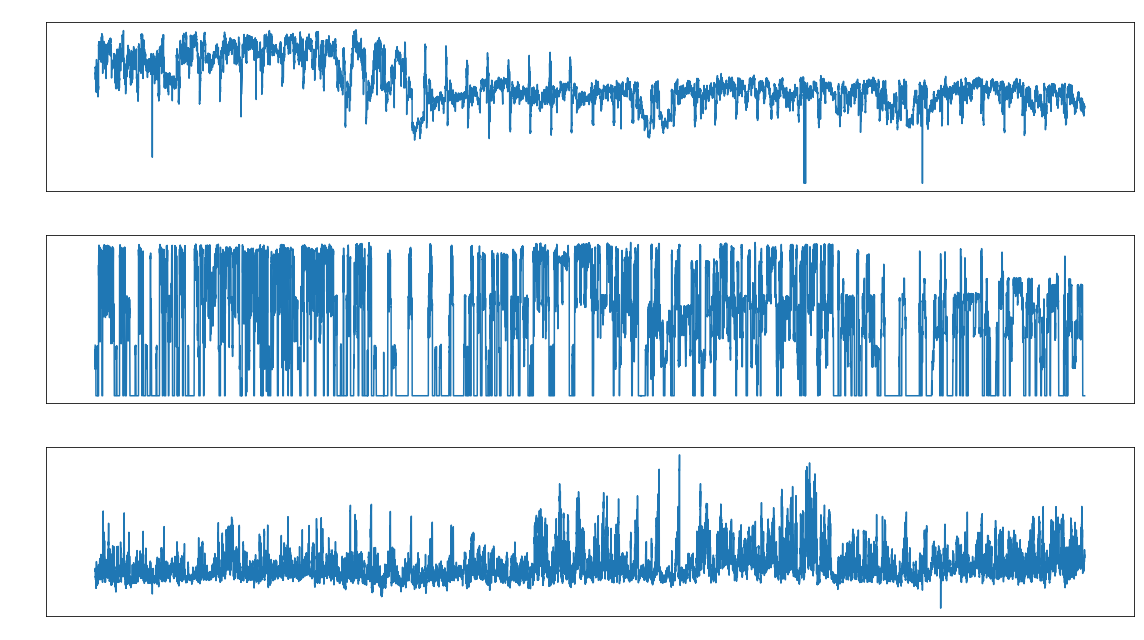

In [71]:
def feature_plot(feature):
    plt.figure(figsize=(8, 6))
    plt.tick_params(axis='x', colors='white')
    plt.tick_params(axis='y', colors='white')
    plt.plot(df.index, df[feature])

def multi_plot(features):
    fig,axs = plt.subplots(len(features),figsize=(16,9))
    for x in range(len(features)):
        axs[x].plot(df.index, df[features[x]])
        axs[x].set_title(features[x],color = "white")
        axs[x].tick_params(axis='x', colors='white')
        axs[x].tick_params(axis='y', colors='white')
        
    fig.tight_layout()

#feature_plot("generation biomass")
multi_plot(["generation biomass","generation fossil brown coal/lignite","generation fossil gas"])



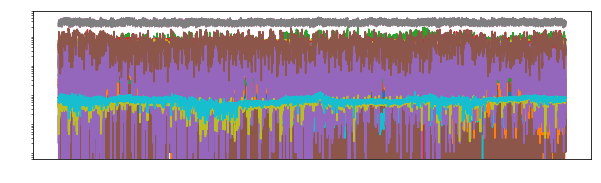

In [72]:
#plot all features
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(2, 1, 1)
for column in df:
    ax.plot(df.index, df[column])
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.set_yscale("log")